In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans



In [ ]:
#DOWNLOAD DATA KENDARAAN_TRAIN
!gdown --id 1VAFV-soyTtaUx8k1sWR1kkCtuDA_yX3V

Downloading...
From: https://drive.google.com/uc?id=1VAFV-soyTtaUx8k1sWR1kkCtuDA_yX3V
To: /content/kendaraan_train.xlsx
100% 14.3M/14.3M [00:00<00:00, 126MB/s]


In [ ]:
#BACA DATA KENDARAAN_TRAIN
data1 = pd.read_excel("kendaraan_train.xlsx")
data1

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,< 1 Tahun,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


In [ ]:
#DOWNLOAD KENDARAAN_TEST
!gdown --id 1-tLY7LwlMwG7Kxk3u58J9gDNhSmfCIpa

Downloading...
From: https://drive.google.com/uc?id=1-tLY7LwlMwG7Kxk3u58J9gDNhSmfCIpa
To: /content/kendaraan_test.xlsx
100% 2.13M/2.13M [00:00<00:00, 68.1MB/s]


In [ ]:
#BACA DATA KENDARAAN_TEST
data2 = pd.read_excel("kendaraan_test.xlsx")
data2

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,22,1,52,0,1-2 Tahun,Pernah,32895,124,71,1
1,Pria,54,1,52,0,1-2 Tahun,Pernah,43388,124,198,0
2,Wanita,24,1,52,0,1-2 Tahun,Pernah,45032,124,171,0
3,Wanita,78,1,52,0,> 2 Tahun,Pernah,42825,26,208,1
4,Wanita,45,1,52,0,1-2 Tahun,Pernah,2630,26,228,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,41,1,0,0,1-2 Tahun,Pernah,2630,78,20,0
47635,Pria,39,1,0,0,1-2 Tahun,Pernah,2630,124,200,0
47636,Pria,33,1,0,1,< 1 Tahun,Tidak,2630,152,152,0
47637,Wanita,71,1,0,0,1-2 Tahun,Pernah,2630,25,226,0


In [ ]:
#INFO DATA KENDARAAN_TRAIN
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 285831 non-null  int64  
 1   Jenis_Kelamin      271391 non-null  object 
 2   Umur               271617 non-null  float64
 3   SIM                271427 non-null  float64
 4   Kode_Daerah        271525 non-null  float64
 5   Sudah_Asuransi     271602 non-null  float64
 6   Umur_Kendaraan     271556 non-null  object 
 7   Kendaraan_Rusak    271643 non-null  object 
 8   Premi              271262 non-null  float64
 9   Kanal_Penjualan    271532 non-null  float64
 10  Lama_Berlangganan  271839 non-null  float64
 11  Tertarik           285831 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 26.2+ MB


In [ ]:
#INFO DATA KENDARAAN_TEST
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Kanal_Penjualan    47639 non-null  int64 
 9   Lama_Berlangganan  47639 non-null  int64 
 10  Tertarik           47639 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 4.0+ MB


In [ ]:
#DESCRIBE SEMUA DATA1
data1.describe()

,id,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
count,285831.000000,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000,285831.000000
mean,142916.000000,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302,0.122471
std,82512.446734,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910,0.327830
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,71458.500000,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000,0.000000
50%,142916.000000,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000,0.000000
75%,214373.500000,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000,0.000000
max,285831.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
#MELIHAT UKURAN DATA1
data1.shape

(285831, 12)

In [ ]:
#CEK JUMLAH NULL DALAM TIAP KOLOM
check_null = data1.isnull().sum()
print(check_null)

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64


In [ ]:
#MENAMPILKAN JUMLAH DATA YANG DUPLIKAT
dupl = data1.duplicated()
print('Number of duplicate rows = %d' % (dupl.sum()))

Number of duplicate rows = 0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


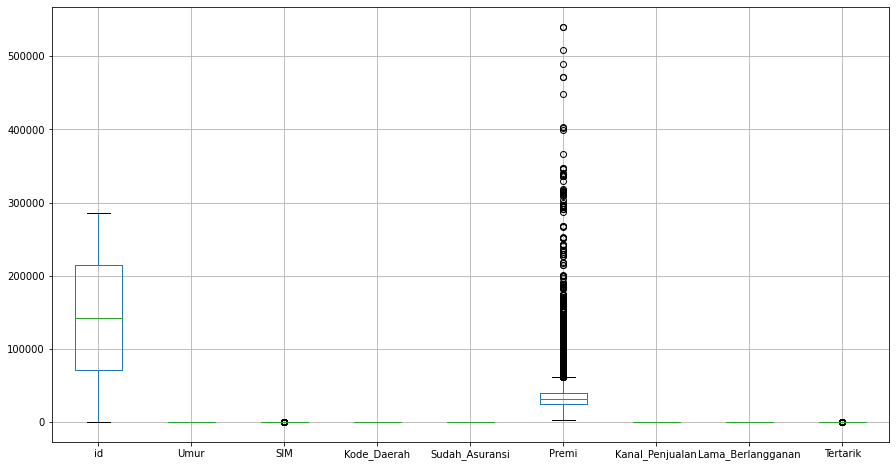

In [ ]:
#CEK OUTLIER
data1.boxplot(figsize=[15,8])

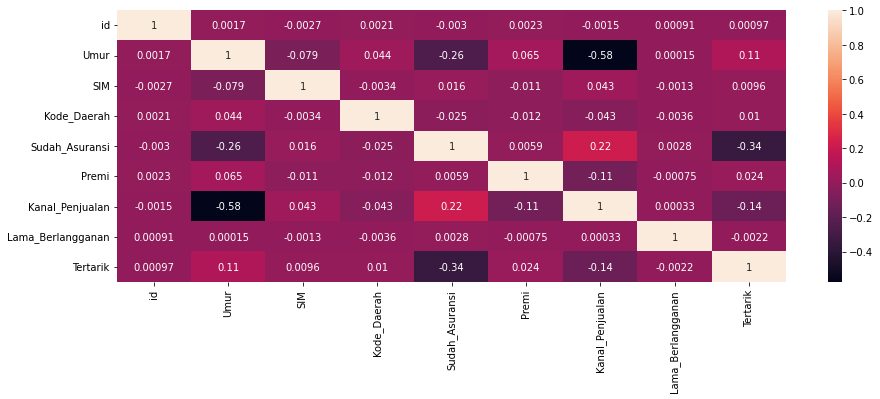

In [ ]:
#KORELASI
korelasi = data1.corr()
plt.subplots(figsize=(15,5))
sns.heatmap(korelasi, annot = True )

DATA CLEAN(PEMBERSIHAN DATA)

In [ ]:
#SPLIT DATA
data1_x = data1.iloc[:,:11]
data1_y = data1['Tertarik']

In [ ]:
print('Data Shape x : ', data1_x.shape)

Data Shape x :  (285831, 11)


In [ ]:
print('Data Shape y : ', data1_y.shape)

Data Shape y :  (285831,)


In [ ]:
data1_y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Tertarik, dtype: int64

In [ ]:
data1_x.head(5)

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,< 1 Tahun,28029.0,152.0,97.0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0


In [ ]:
#DROP NULL DATAFRAME
data1_x.dropna(inplace = True, axis =0)
data1_x.shape

(171068, 11)

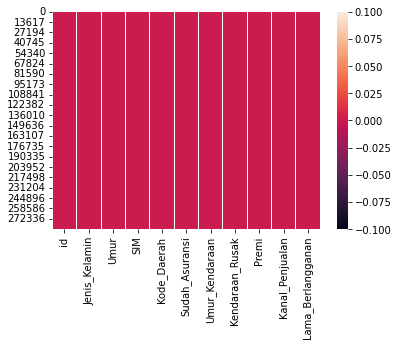

In [ ]:
#HEATMAP CEK NILAI NULL SETIAP KOLOM
heatmap = sns.heatmap(data1_x.isnull())

In [ ]:
data1_x.to_excel(r'kendaraan_train.xlsx', index =  False)

In [ ]:
data1_x.head(5)

In [ ]:
data1_x.info()

In [ ]:
#MEMBUAT INDEX BARU
#karena id sudah teracak

data1_x = data1_x.drop(['id'], axis = 1)
data1_x = data1_x.reset_index(drop=True)

In [ ]:
data1_x.head()

In [ ]:
print('Nilai unique dari tipe data objects yaitu :')

#MELIHAT NILAI UNIK JENIS KELAMIN
print('----Unik Jenis Kelamin----')
print(data1_x['Jenis_Kelamin'].unique())

#MELIHAT NILAI UNIK UMUR KENDARAAN
print('----Unik Umur Kendaraan----')
print(data1_x['Umur_Kendaraan'].unique())

#MELIHAT NILAI UNIK KENDARAAN RUSAK
print('----Unik Kendaraan Rusak----')
print(data1_x['Kendaraan_Rusak'].unique())

In [ ]:
#LABEL MAPPING OBJECT MENJADI NUMERICAL
mp = {
    'Wanita': 0,'Pria': 1,'< 1 Tahun': 0,'> 2 Tahun': 2,'1-2 Tahun': 1,'Pernah' : 1,'Tidak': 0,
    
} 
#KATEGORI MAPPING
data1_x = data1_x.replace({'Jenis_Kelamin':mp,'Umur_Kendaraan':mp,'Kendaraan_Rusak':mp})
data1_x.head()

In [ ]:
data1_x.to_excel(r'kendaraaan_notchar.xlsx', index = False)

In [ ]:
#HILANGKAN OUTLIERS USING Z-Score
Q1 = data1_x.quantile(0.25)
Q3 = data1_x.quantile(0.75)
IQR = Q3 - Q1

data1_x = data1_x.loc[~((data1_x < (Q1 - 1.5 * IQR)).any(axis=1)|(data1_x > (Q3 + 1.5 * IQR)).any(axis=1))].dropna()
data1_x.reset_index(drop=True, inplace=True)


In [ ]:
data1_x.shape

In [ ]:
data1_x.plot(kind = 'box',figsize = [60,55], subplots = True, layout = (30,25), sharex = False, sharey = False)
plt.show()

In [ ]:
data1_x.to_excel(r'kendaraan_n-outlier.xlsx', index = False)

In [ ]:
#NORMALISASI MENGGUNAKAN MINMAXSCALER
scaler = MinMaxScaler()
data1_x = pd.DataFrame(scaler.fit_transform(data1_x), columns=data1_x.columns)
data1_x


In [ ]:
#KORELASI ANTAR VARIABLE
plt.figure(figsize=(15,5))
sns.heatmap(data1_x.corr(), annot = True, linewidths=.5)
plt.title("Korelasi Antar Variable" , y = 1.1)
plt.show()

CLUSTERING K-MEANS

In [ ]:
#COMBINE KOLOM DAN BUAT X DAN Y
pca       = PCA(n_components = 2)
pca_data  = pca.fit_transform(data1_x)
pca_data1 = pd.DataFrame(data = pca_data, columns = ['PCA 1', 'PCA 2'])
pca_data1.shape 

In [ ]:
plt.scatter(pca_data[:,0],pca_data[:,1])

In [ ]:
pca_data

In [ ]:
pca_data1.head()

In [ ]:
#INISIALISASI VARIABLE
# JUMLAH CENTROID 
K = 10 
 # JUMLAH ITERASI ATAU PERULANGAN             
iterations = 5   

nilaipca = pca_data1.values.shape
print(nilaipca)

In [ ]:
#BUAT CENTROID
centroids = np.array([]).reshape(nilaipca[1],0) 
print('Membuat centroid = ', centroids)

In [ ]:
# RANDOM CENTROID SECARA ACAK
for i in range(K):
    rand=np.random.randint(0,nilaipca[0]-1)
    centroids=np.c_[centroids,pca_data1.values[rand]]

  
for i in range(iterations):
    # MEMBUAT MATRIX UNTUK MENGHITUNG JARAK EUCLIDIAN
    EuclidianDistance=np.array([]).reshape(nilaipca[0],0)
    for i in range(K):
        tempDist = np.sum((pca_data1-centroids[:,i])**2,axis=1)
        EuclidianDistance=np.c_[EuclidianDistance,tempDist]
    hasil = np.argmin(EuclidianDistance,axis=1)+1

    temp={}
    for i in range(K):
        temp[i+1]=np.array([]).reshape(2,0)

    for i in range(nilaipca[0]):
        temp[hasil[i]]=np.c_[temp[hasil[i]],pca_data1.values[i]]

    for i in range(K):
        temp[i+1]=temp[i+1].T

    for i in range(K):
         centroids[:,i]=np.mean(temp[i+1],axis=0)
    output = temp

    colors = [
     'yellow',
     'blue'
    ]
    labels=[
      'tertarik','tidak tertarik']
    colors

In [ ]:
# melakukan ploting dengan scatter beserta labeling
for k in range(K):
    plt.scatter(output[k+1][:,0],output[k+1][:,1],c=colors[k],label=labels[k])
    
plt.scatter(centroids[0,:],centroids[1,:],s=10,c='black',label='centroids')
plt.legend()
plt.show()

DATA CLUSTERING K-MEANS LIBRARY

In [ ]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 2, max_iter = 150)
y_kmeans = kmeans.fit_predict(pca_data1)
y_kmeans

In [ ]:
# Visualising the clusters
for i in range(K):
    plt.scatter(pca_data1.values[y_kmeans == i, 0], pca_data1.values[y_kmeans == i, 1], c=colors[i],label=labels[i])
    K1 = kmeans.cluster_centers_

plt.scatter(
            K1[:, 0], 
            K1[:, 1], 
            s=10,c='violet',
            label='centroids'
            )

plt.title('Clusters of KMeans')
plt.xlabel(pca_data1.columns[0])
plt.ylabel(pca_data1.columns[1])
plt.legend()
plt.show()
